# Housing prices for King County

Training a simple polynomial model on Hosing Sale data from king country [data source](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)
As a learning exercise

In [1]:
from utils import load_data
from train import compute_cost, compute_gradient, gradient_descent
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# Data is a pandas DataFrame
data = load_data.load_data("./data/kc_house_data.csv")


# Feature Engineering
Housing prices do not tend to be linear but curve like, thus we will be engineering some polynomial features

In [2]:
labels = data['price']
data.drop(['price', 'date', 'id', 'lat', 'long'], axis=1, inplace=True)
dataSquared = data.pow(2)
dataSquared.rename(lambda c: f"{c} squared", inplace=True, axis='columns')

dataCubed = data.pow(3)
dataCubed.rename(lambda c: f"{c} cubed", inplace=True, axis='columns')

engineeredData = data.join(dataSquared).join(dataCubed)

engineeredData[0:5]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,view cubed,condition cubed,grade cubed,sqft_above cubed,sqft_basement cubed,yr_built cubed,yr_renovated cubed,zipcode cubed,sqft_living15 cubed,sqft_lot15 cubed
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,27,343,1643032000,0,7472058875,0,946329856735752,2406104000,180362125000
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,27,343,10218313000,64000000,7426288351,7892485271,944798095703125,4826809000,445768658119
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,27,216,456533000,0,7222633237,0,941998966517952,20123648000,523996494328
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,125,343,1157625000,753571000,7587307125,0,945115872339456,2515456000,125000000000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,27,512,4741632000,0,7845011803,0,943325698349224,5832000000,422381452527


# Training Data
We have split the data into two halves, the first half will be the training data. Matrix trainingSamples contains our examples. Each row is an example and each column is a feature. Vector trainingLabels contains the labels for our training set.

In [3]:
total_rows = len(engineeredData)
trainingSetRows = total_rows // 2
trainingSamples = engineeredData[0:trainingSetRows].copy()
trainingLabels = labels[0:trainingSetRows].copy()

print(f"trainingSamples shape: {trainingSamples.shape}")
print(f"trainingLabels shape: {trainingLabels.shape}")

trainingSamples shape: (10806, 48)
trainingLabels shape: (10806,)


# Feature Scaling


In [4]:
means = engineeredData.mean()
stds = engineeredData.std()
print(engineeredData[:5])
for column in engineeredData.columns:
    engineeredData[column] = engineeredData[column] - means[column]
    engineeredData[column] = engineeredData[column] / stds[column]
print(engineeredData[:5])

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  ...  view cubed  condition cubed  \
0          3      7        1180  ...           0               27   
1          3      7        2170  ...           0               27   
2          3      6         770  ...           0               27   
3          5      7        1050  ...           0              125   
4          3      8        1680  ...           0               27   

   grade cubed  sqft_above cubed  sqft_basement cubed  yr_built cubed  \
0          343        1643032000                    0      74

# Parameters
Parameter vector w and param b


In [5]:
b = 1
w = np.random.random_sample(trainingSamples.shape[1])
print(f"w shape: {w.shape}")
print(f"Initial cost: {compute_cost(trainingSamples.to_numpy(), trainingLabels.to_numpy(), w, b)}")
dj_dw, dj_db = compute_gradient(trainingSamples.to_numpy(), trainingLabels.to_numpy(), w, b)
print(f"Initial gradient dw:  {dj_dw})")
print(f"Initial gradient db: {dj_db})")

w shape: (48,)
Initial cost: 1.0469690709877973e+33
Initial gradient dw:  [7.27189744e+15 4.63587301e+15 5.25284579e+18 1.32685389e+21
 3.10155579e+15 1.70675453e+13 1.72633493e+15 7.23423597e+15
 1.64755118e+16 4.66095926e+18 5.91886536e+17 4.04755585e+18
 9.43165121e+16 2.01677518e+20 4.69437864e+18 3.70855736e+20
 2.73524090e+16 1.24574547e+16 1.67243413e+22 1.63756516e+27
 5.28733052e+15 1.70675453e+13 5.09864425e+15 2.63481791e+16
 1.38406772e+17 1.30466315e+22 7.74911587e+20 7.96723294e+21
 1.88280581e+20 1.97744216e+25 1.14978171e+22 1.69130335e+26
 1.07969703e+17 3.74511656e+16 6.26987181e+25 2.26997439e+33
 1.00212268e+16 1.70675453e+13 1.52900604e+16 9.94830662e+16
 1.21849669e+18 4.25143597e+25 1.19607968e+24 1.56875198e+25
 3.75875079e+23 1.93887659e+30 3.00042615e+25 9.98150868e+31])
Initial gradient db: 2056890931136279.8)


In [ ]:
# Run gradient descent
alpha = 1.0e-34
iterations = 10000
w_final, b_final, j_history = gradient_descent(trainingSamples.to_numpy(), trainingLabels.to_numpy(), w, b, compute_cost, compute_gradient, alpha, iterations)
print(f"Final cost: {compute_cost(trainingSamples.to_numpy(), trainingLabels.to_numpy(), w_final, b_final)}")


Iteration    0: Cost 594774299899732719235874464727040.00   
Iteration 1000: Cost 212163634848724203360395198464.00   
Iteration 2000: Cost 176189914769010815423307841536.00   


# Plotting cost vs iterations


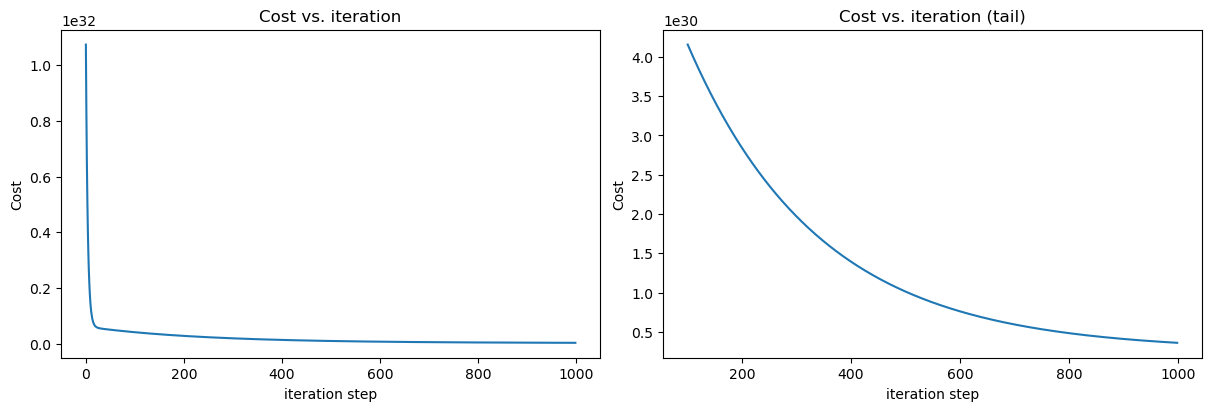

In [7]:


fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_history)
ax2.plot(100 + np.arange(len(j_history[100:])), j_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()